<a href="https://colab.research.google.com/github/MrDataProf/portfolio/blob/main/sentiment_analysis_with_imdb_movie_reviews_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_files


In [ ]:
# Load the IMDb Movie Reviews dataset
imdb_dataset = pd.read_csv('IMDB_Dataset.csv')
imdb_dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
X = imdb_dataset['review'].values
y = imdb_dataset['sentiment'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Limiting the number of features for simplicity
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Train a simple Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Make predictions
y_pred_nb = clf_nb.predict(X_test_vec)


In [ ]:
# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)

Naive Bayes Accuracy: 0.8361
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.85      0.84      4961
    positive       0.85      0.82      0.83      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



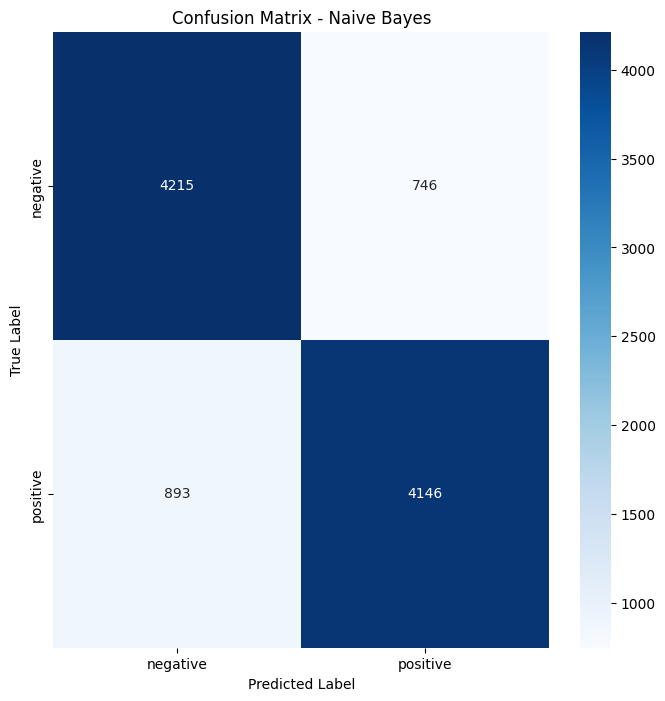

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_nb, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Interpretation
**Evaluation:**
The evaluation metrics provide a comprehensive view of the performance of the Naive Bayes classifier on the sentiment analysis task. Let's interpret each part of the output:

**Accuracy:**
The accuracy score of 0.8361 indicates that the model correctly predicted the sentiment (positive or negative) for approximately 83.61% of the reviews in the test set.

**Classification Report:**
The classification report breaks down the performance of the classifier for each class ('negative' and 'positive'):

**Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. For the 'negative' class, precision is 0.83, and for the 'positive' class, precision is 0.85. High precision indicates that the classifier has a low false-positive rate.

**Recall (Sensitivity or True Positive Rate)**: Recall is the ratio of correctly predicted positive observations to the total actual positives. For the 'negative' class, recall is 0.85, and for the 'positive' class, recall is 0.82. High recall indicates that the classifier captures a high proportion of actual positives.

**F1-Score:** The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score for 'negative' is 0.84, and for 'positive' is 0.83.

**Support:** Support is the number of actual occurrences of the class in the specified dataset. In this case, 'negative' has a support of 4961, and 'positive' has a support of 5039.

**Macro Avg and Weighted Avg:**
Macro Avg: The average of precision, recall, and F1-score across all classes. The macro average in this case is 0.84.

**Weighted Avg**: The weighted average of precision, recall, and F1-score, considering the support for each class. The weighted average in this case is 0.84.

**Summary**:
Overall, the Naive Bayes classifier performs reasonably well on this sentiment analysis task, with a balanced trade-off between precision and recall. The accuracy and F1-score suggest that the model generalizes effectively to both positive and negative sentiments in the IMDb movie reviews dataset.





